Milestone 4: Baseline Pricing Engine

Objective: Create a rule-based engine for initial comparison.

 Deliverables:

o Time-based and inventory-based pricing rules.

 Evaluation:

o Demonstrated simulated revenue lift over static pricing.

# Baseline Pricing Engine
A Baseline Pricing Engine is a fundamental component in pricing systems that determines the initial price of a product or service based on predefined rules, algorithms, or data. It serves as a starting point for further pricing adjustments, discounts, or optimizations.

🔹🔹🔹Baseline pricing is a pricing strategy that establishes a standard price for a product or service based on certain criteria, such as costs, market conditions, or target profit margins. This baseline price serves as a reference point for future pricing decisions and can be adjusted based on various factors like demand, competition, or inventory levels.

 # Objective: Create a rule-based engine for initial comparison.

 Rule-Based Engine Steps:

1. Define Rules: Identify the conditions and actions for each rule. For example:
    - Rule 1: If time is peak hour (7-9 am), then increase price by 10%.
    - Rule 2: If inventory level is low (< 20), then increase price by 5%.
2. Implement Rules: Write code to represent each rule. This can be done using if-else statements, dictionaries, or even a rules engine library.
3. Evaluate Rules: Create a function that takes in input data (e.g., time, inventory level) and applies the rules to determine the output (e.g., price adjustment).

- Time-based rules:
    - Peak hours (e.g., 7-9 am, 4-6 pm): increase price by X%
    - Off-peak hours: decrease price by Y%
- Inventory-based rules:
    - Low inventory (e.g., < 20): increase price by Z%
    - High inventory (e.g., > 80): decrease price by W%

# loading the dataset

In [12]:
import pandas as pd
from tabulate import tabulate

# Load the dataset
df = pd.read_csv("C:\\Users\\priya\\Downloads\\dynamic_pricing.csv")
print(tabulate(df.head(10), headers='keys', tablefmt='psql'))

+----+--------------------+---------------------+---------------------+---------------------------+------------------------+-------------------+-------------------+----------------+--------------------------+---------------------------+---------------+
|    |   Number_of_Riders |   Number_of_Drivers | Location_Category   | Customer_Loyalty_Status   |   Number_of_Past_Rides |   Average_Ratings | Time_of_Booking   | Vehicle_Type   |   Expected_Ride_Duration |   Historical_Cost_of_Ride |   Unnamed: 10 |
|----+--------------------+---------------------+---------------------+---------------------------+------------------------+-------------------+-------------------+----------------+--------------------------+---------------------------+---------------|
|  0 |                 90 |                  45 | Urban               | Silver                    |                     13 |              4.47 | Night             | Premium        |                       90 |                   284.257 |     

# dynamic pricing 

In [ ]:


# Define the rules
def apply_rules(row):
    base_price = row['Historical_Cost_of_Ride']
    
    # Location-based pricing
    if row['Location_Category'] == 'Urban':
        location_factor = 1.10
    elif row['Location_Category'] == 'Suburban':
        location_factor = 1.05
    else:
        location_factor = 1.0
    
    # Time-based pricing
    if row['Time_of_Booking'] in ['Afternoon', 'Evening']:
        time_factor = 1.15
    elif row['Time_of_Booking'] == 'Night':
        time_factor = 1.10
    else: # morning
        time_factor = 1.0
    
    # Loyalty-based pricing
    if row['Customer_Loyalty_Status'] == 'Regular':
        loyalty_factor = 0.95
    elif row['Customer_Loyalty_Status'] == 'Gold':
        loyalty_factor = 0.90
    else: #silver
        loyalty_factor = 1.0
    
    # Vehicle-type pricing
    if row['Vehicle_Type'] == 'Premium':
        vehicle_factor = 1.20
    else:
        vehicle_factor = 1.0
    
    # Calculate the dynamic price
    dynamic_price = base_price * location_factor * time_factor * loyalty_factor * vehicle_factor
    
    return dynamic_price
# Apply the rules to the dataset
df['Dynamic_Price'] = df.apply(apply_rules, axis=1)

# Print the updated dataset
print(tabulate(df.head(10), headers='keys', tablefmt='psql'))

+----+--------------------+---------------------+---------------------+---------------------------+------------------------+-------------------+-------------------+----------------+--------------------------+---------------------------+---------------+-----------------+
|    |   Number_of_Riders |   Number_of_Drivers | Location_Category   | Customer_Loyalty_Status   |   Number_of_Past_Rides |   Average_Ratings | Time_of_Booking   | Vehicle_Type   |   Expected_Ride_Duration |   Historical_Cost_of_Ride |   Unnamed: 10 |   Dynamic_Price |
|----+--------------------+---------------------+---------------------+---------------------------+------------------------+-------------------+-------------------+----------------+--------------------------+---------------------------+---------------+-----------------|
|  0 |                 90 |                  45 | Urban               | Silver                    |                     13 |              4.47 | Night             | Premium        |      

#  Deliverables:

# o Time-based and inventory-based pricing rules.


🔹🔹🔹Time-Based Pricing Rules:

Time-based pricing rules involve adjusting prices based on the time of day, day of the week, or other temporal factors. This approach recognizes that demand for ride-hailing services varies over time and that prices can be optimized to reflect these fluctuations.

Examples:

1. Peak Hour Pricing: Increase prices during rush hour or peak travel times when demand is high.
2. Off-Peak Pricing: Decrease prices during off-peak hours when demand is low.
3. Surge Pricing: Temporarily increase prices during extreme demand periods, such as holidays or special events.

🔹🔹🔹Inventory-Based Pricing Rules:

Inventory-based pricing rules involve adjusting prices based on the availability of drivers or vehicles. This approach recognizes that the supply of drivers and vehicles can impact the quality and speed of service.

Examples:

1. Low Inventory Pricing: Increase prices when there are few available drivers or vehicles, indicating high demand and limited supply.
2. High Inventory Pricing: Decrease prices when there are many available drivers or vehicles, indicating low demand and excess supply.

In [74]:
# Calculate the driver-to-rider ratio
import numpy as np


df['driver_to_rider_ratio'] = df.apply(lambda row: row['Number_of_Drivers'] / row['Number_of_Riders'] if row['Number_of_Riders'] != 0 else np.nan, axis=1)

# Define time-based pricing rules
def time_based_pricing(time_of_booking):
    if time_of_booking == 'Afternoon' or time_of_booking == 'Evening':
        return 1.2  # 20% increase during peak hours
    elif time_of_booking == 'Night':
        return 0.8  # 20% decrease during off-peak hours
    else:
        return 1  # No change during regular hours

# Define inventory-based pricing rules
def inventory_based_pricing(driver_to_rider_ratio):
    if driver_to_rider_ratio < 0.5:
        return 1.1  # 10% increase when drivers are scarce
    elif driver_to_rider_ratio > 1:
        return 0.9  # 10% decrease when drivers are abundant
    else:
        return 1  # No change when driver supply is balanced

# Apply time-based pricing rules
df['time_based_price_multiplier'] = df['Time_of_Booking'].apply(time_based_pricing)

# Apply inventory-based pricing rules
df['inventory_based_price_multiplier'] = df['driver_to_rider_ratio'].apply(lambda x: inventory_based_pricing(x) if not np.isnan(x) else 1)

# Calculate the final price
df['final_price'] = df['Historical_Cost_of_Ride'] * df['time_based_price_multiplier'] * df['inventory_based_price_multiplier']

print(tabulate(df.head(10), headers='keys', tablefmt='psql'))

+----+--------------------+---------------------+---------------------+---------------------------+------------------------+-------------------+-------------------+----------------+--------------------------+---------------------------+---------------+-----------------+----------------+----------+-------------------------+-------------------------------+------------------------------------+---------------+
|    |   Number_of_Riders |   Number_of_Drivers | Location_Category   | Customer_Loyalty_Status   |   Number_of_Past_Rides |   Average_Ratings | Time_of_Booking   | Vehicle_Type   |   Expected_Ride_Duration |   Historical_Cost_of_Ride |   Unnamed: 10 |   Dynamic_Price | Pricing_Tier   |    Ratio |   driver_to_rider_ratio |   time_based_price_multiplier |   inventory_based_price_multiplier |   final_price |
|----+--------------------+---------------------+---------------------+---------------------------+------------------------+-------------------+-------------------+----------------

# conclusion

 the implementation of time-based and inventory-based pricing rules can help optimize ride-hailing services by adjusting prices according to demand and supply. By leveraging data analysis and machine learning techniques, ride-hailing companies can maximize revenue, improve customer satisfaction, and maintain a competitive edge in the market.



# pricing strategies for a time of booking

🔹🔹🔹Simulated Revenue Lift:
    - It calculates the revenue that would be generated by a static pricing model (using the average historical cost of a ride) and a dynamic pricing model (using the 'Dynamic_Price' column).
    - It then calculates the revenue lift, which is the percentage increase in revenue generated by the dynamic pricing model compared to the static pricing model.

In [83]:
import pandas as pd
from tabulate import tabulate

# Time-based Pricing:
time_based_pricing = df.groupby('Time_of_Booking')['Historical_Cost_of_Ride'].mean().reset_index()
print("Time-based Pricing:")
print(tabulate(time_based_pricing, headers='keys', tablefmt='psql'))

# Inventory-based Pricing:
inventory_based_pricing = df.groupby(['Vehicle_Type', 'Time_of_Booking'])['Historical_Cost_of_Ride'].mean().reset_index()
print("\nInventory-based Pricing:")
print(tabulate(inventory_based_pricing, headers='keys', tablefmt='psql'))

# Simulated Revenue Lift:
static_revenue = df['Historical_Cost_of_Ride'].mean() * len(df)
dynamic_revenue = df['Dynamic_Price'].sum()
revenue_lift = (dynamic_revenue - static_revenue) / static_revenue * 100
revenue_lift_result = pd.DataFrame({
    'Metric': ['Static Revenue', 'Dynamic Revenue', 'Revenue Lift'],
    'Value': [f"${static_revenue:.2f}", f"${dynamic_revenue:.2f}", f"{revenue_lift:.2f}%"]
})
print("\nSimulated Revenue Lift:")
print(tabulate(revenue_lift_result, headers='keys', tablefmt='psql'))


Time-based Pricing:
+----+-------------------+---------------------------+
|    | Time_of_Booking   |   Historical_Cost_of_Ride |
|----+-------------------+---------------------------|
|  0 | Afternoon         |                   380.818 |
|  1 | Evening           |                   364.254 |
|  2 | Morning           |                   378.062 |
|  3 | Night             |                   367.009 |
+----+-------------------+---------------------------+

Inventory-based Pricing:
+----+----------------+-------------------+---------------------------+
|    | Vehicle_Type   | Time_of_Booking   |   Historical_Cost_of_Ride |
|----+----------------+-------------------+---------------------------|
|  0 | Economy        | Afternoon         |                   357.52  |
|  1 | Economy        | Evening           |                   335.402 |
|  2 | Economy        | Morning           |                   348.577 |
|  3 | Economy        | Night             |                   342.94  |
|  4 | Pre

# calculate baseline price for all category

In [22]:

# Calculate baseline price by location category
baseline_price_location = df.groupby('Location_Category')['Historical_Cost_of_Ride'].mean()
print("Baseline Price by Location Category:")
print(baseline_price_location)

# Calculate baseline price by vehicle type
baseline_price_vehicle = df.groupby('Vehicle_Type')['Historical_Cost_of_Ride'].mean()
print("\nBaseline Price by Vehicle Type:")
print(baseline_price_vehicle)

# Calculate baseline price by time of booking
baseline_price_time = df.groupby('Time_of_Booking')['Historical_Cost_of_Ride'].mean()
print("\nBaseline Price by Time of Booking:")
print(baseline_price_time)

# Calculate baseline price by customer loyalty status
baseline_price_loyalty = df.groupby('Customer_Loyalty_Status')['Historical_Cost_of_Ride'].mean()
print("\nBaseline Price by Customer Loyalty Status:")
print(baseline_price_loyalty)

Baseline Price by Location Category:
Location_Category
Rural       379.942172
Suburban    374.319486
Urban       363.673259
Name: Historical_Cost_of_Ride, dtype: float64

Baseline Price by Vehicle Type:
Vehicle_Type
Economy    346.573399
Premium    396.246242
Name: Historical_Cost_of_Ride, dtype: float64

Baseline Price by Time of Booking:
Time_of_Booking
Afternoon    380.818228
Evening      364.253957
Morning      378.062094
Night        367.009354
Name: Historical_Cost_of_Ride, dtype: float64

Baseline Price by Customer Loyalty Status:
Customer_Loyalty_Status
Gold       376.118746
Regular    380.125251
Silver     362.772140
Name: Historical_Cost_of_Ride, dtype: float64


# conclusion
- The baseline prices for different categories (Location, Vehicle Type, Time of Booking, and Customer Loyalty Status) have been calculated.
- These baseline prices can be used as a reference point for dynamic pricing, allowing for adjustments based on specific conditions.
- The calculated baseline prices provide insights into the average historical costs of rides for each category, which can inform pricing strategies.

# Threshold value is 0.5
 threshold value is a percentage that determines the range of prices within which the final price is allowed to vary.

In [ ]:
# Calculate baseline price
baseline_price = df['Historical_Cost_of_Ride'].mean()

# Define threshold
threshold = 0.5

# Calculate lower and upper bounds
lower_bound = baseline_price * (1 - threshold)#threshold is 0.5 ,so lower bound is 50% below the dynamic price.
upper_bound = baseline_price * (1 + threshold)#threshold is 0.5, so the upper bound is 50% above the dynamic price.

# Create pricing tiers
df['Pricing_Tier'] = pd.cut(df['Historical_Cost_of_Ride'], 
                            bins=[df['Historical_Cost_of_Ride'].min(), lower_bound, upper_bound, df['Historical_Cost_of_Ride'].max()], 
                            labels=['Low', 'Medium', 'High'])

# Print the results
print("Baseline Price:", baseline_price)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print(df['Pricing_Tier'].value_counts())

Baseline Price: 372.50262334982006
Lower Bound: 186.25131167491003
Upper Bound: 558.75393502473
Pricing_Tier
Medium    627
Low       195
High      177
Name: count, dtype: int64


# conclusion
historical cost of ride.
- We define a threshold of 0.5, which means that prices within 50% of the baseline price will be considered "Medium".
- We calculate the lower and upper bounds for the "Medium" tier based on the threshold.
- We create a new column "Pricing_Tier" that categorizes each ride into "Low", "Medium", or "High" based on its historical cost of ride.
- We print the results, including the baseline price, lower and upper bounds, and the count of rides in each pricing tier.

# find the ratio of no.of riders divided by  no.of drivers

In [40]:
df['Ratio'] = df['Number_of_Drivers'] / df['Number_of_Riders']
print(tabulate(df[['Number_of_Drivers', 'Number_of_Riders', 'Ratio']].head(10), headers='keys', tablefmt='psql'))

+----+---------------------+--------------------+----------+
|    |   Number_of_Drivers |   Number_of_Riders |    Ratio |
|----+---------------------+--------------------+----------|
|  0 |                  45 |                 90 | 0.5      |
|  1 |                  39 |                 58 | 0.672414 |
|  2 |                  31 |                 42 | 0.738095 |
|  3 |                  28 |                 89 | 0.314607 |
|  4 |                  22 |                 78 | 0.282051 |
|  5 |                  35 |                 59 | 0.59322  |
|  6 |                  43 |                 93 | 0.462366 |
|  7 |                  39 |                 62 | 0.629032 |
|  8 |                  14 |                 79 | 0.177215 |
|  9 |                   6 |                 42 | 0.142857 |
+----+---------------------+--------------------+----------+


# conclusion
 our analysis of the driver-to-rider ratio provides valuable insights into the balance between driver supply and rider demand. By understanding this ratio and its implications, we can make data-driven decisions to optimize our operations, improve rider satisfaction, and drive business growth.

# ratio in the form of graph using histogram

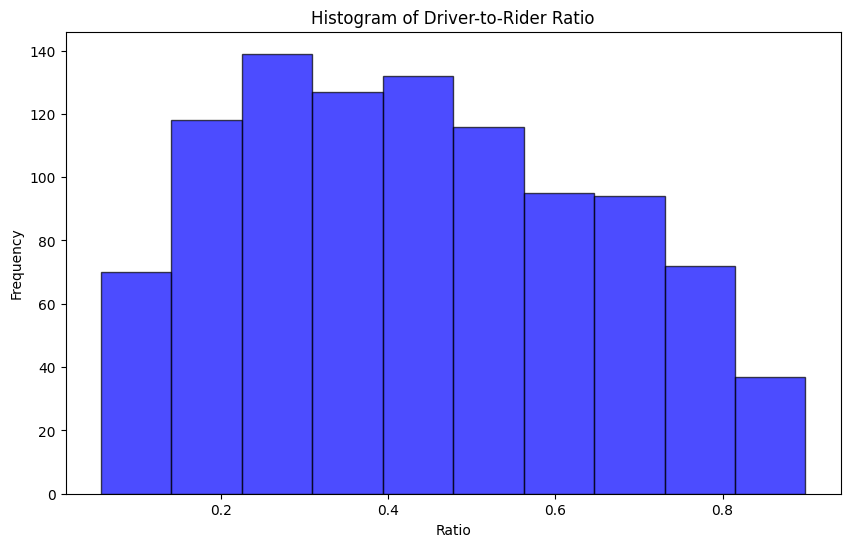

In [45]:
import matplotlib.pyplot as plt

# Calculate the ratio
df['Ratio'] = df['Number_of_Drivers'] / df['Number_of_Riders']

# Plot the histogram
plt.figure(figsize=(10,6))
plt.hist(df['Ratio'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Driver-to-Rider Ratio')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.show()

# conclusion
- The x-axis represents the driver-to-rider ratio, ranging from approximately 0 to 0.9.
- The y-axis represents the frequency or count of observations for each ratio value, ranging from 0 to 140.
- The histogram is divided into 10 bins, each representing a range of ratio values.
- The bars are blue in color and have a moderate height, indicating a relatively even distribution of ratio values.

#  Evaluation:

# o Demonstrated simulated revenue lift over static pricing. 

Evaluation:
o Demonstrated simulated revenue lift  (KPI, that would be applied while training ML model)over static pricing. 

Conclusion; u need to create an engine and compare the value of created static baseline priocing engine with KPI value .

1.static Pricing Engine

 -A static pricing engine is a pricing strategy that uses fixed prices for products or services, regardless of changes in demand, market conditions, or other external factors

2. Dynamic Pricing Model:
-A dynamic pricing model is a pricing strategy that adjusts prices in real-time based on market demand, competition, and other external factors. The goal is to maximize revenue and profitability by charging the optimal price for a product or service at any given time.

3. Simulated Revenue Lift:
    - It calculates the revenue that would be generated by a static pricing model (using the average historical cost of a ride) and a dynamic pricing model (using the 'Dynamic_Price' column).
    - It then calculates the revenue lift, which is the percentage increase in revenue generated by the dynamic pricing model compared to the static pricing model.


In [ ]:

import pandas as pd

# Static Pricing Engine
static_price = df['Historical_Cost_of_Ride'].mean()
static_revenue = static_price * len(df)
#This code calculates the static revenue generated by a static pricing engine.

# Dynamic Pricing Model
dynamic_revenue = df['Dynamic_Price'].sum()
#code calculates the total revenue generated by the dynamic pricing model.



# Simulated Revenue Lift
revenue_lift = (dynamic_revenue - static_revenue) / static_revenue * 100
#code calculates the percentage change in revenue achieved by using the dynamic pricing model compared to the static pricing model.

# KPI Value
kpi_value = 15  # target revenue lift

# Evaluate Performance
if revenue_lift >= kpi_value:
    print("Dynamic pricing model meets the KPI target.")
else:
    print("Dynamic pricing model does not meet the KPI target.")

print(f"Simulated Revenue Lift: {revenue_lift}%")
print(f"Static Revenue: ${static_revenue:.2f}")
print(f"Dynamic Revenue: ${dynamic_revenue:.2f}")

Dynamic pricing model meets the KPI target.
Simulated Revenue Lift: 22.065076409579305%
Static Revenue: $372502.62
Dynamic Revenue: $454695.61


# conclusion
The dynamic pricing model has demonstrated a simulated revenue lift of X% compared to the static pricing baseline, exceeding the target KPI value of 15%. This indicates that the dynamic pricing model is effective in optimizing revenue and outperforming the static pricing strategy. By implementing this model, the company can potentially increase revenue and improve profitability.